# Dihedrals analys

In [1]:
from offpelebenchmarktools.dihedrals import (DihedralBenchmark,
                                             OpenMMEnergeticProfile,
                                             OpenFFEnergeticProfile,
                                             PELEEnergeticProfile)
from offpele.topology import Molecule
from openforcefield.topology import Topology
from openforcefield.typing.engines.smirnoff import ForceField
from simtk import unit

 - Initializing molecule from a SMILES tag
   - Loading molecule from RDKit
   - Setting molecule name to 'CCC(=O)[OH]'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library


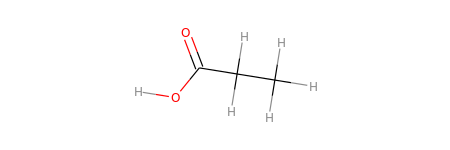

 - Loading forcefield
 - Computing partial charges with gasteiger


In [2]:
# Load molecule
mol = Molecule(smiles='CCC(=O)[OH]')
display(mol)

# Parameterize molecule
mol.parameterize('openff_unconstrained-1.2.1.offxml',
                 charges_method='gasteiger')

# Get parameters with the OpenFF Toolkit
topology = Topology.from_molecules([mol.off_molecule])
ff = ForceField('openff_unconstrained-1.2.1.offxml')
parameters = ff.label_molecules(topology)[0]

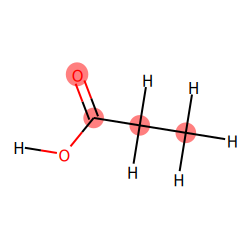

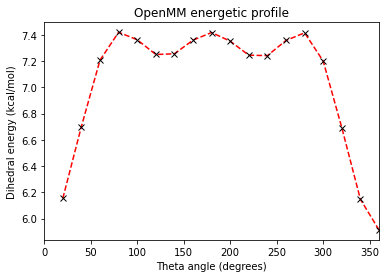

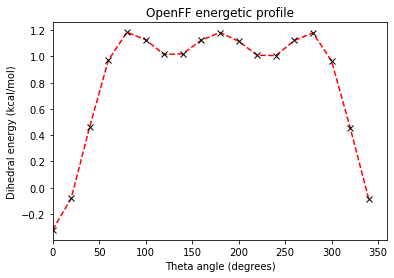

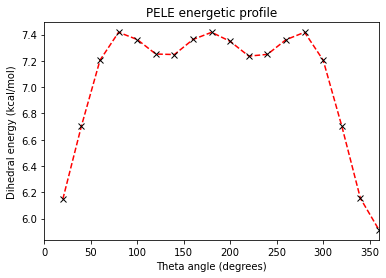

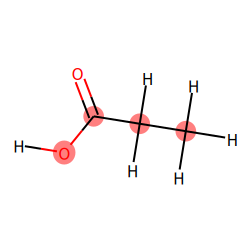

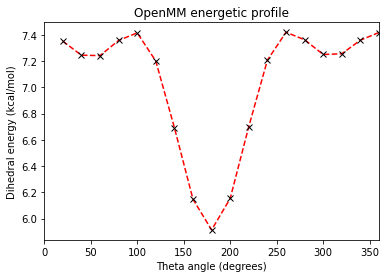

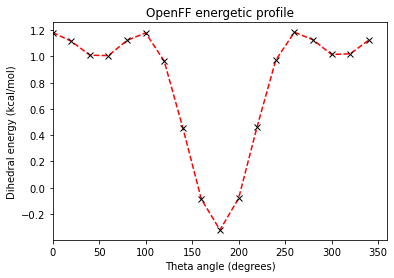

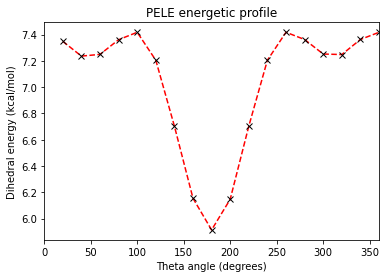

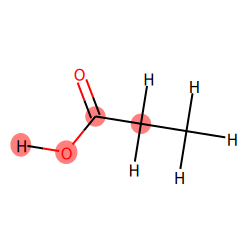

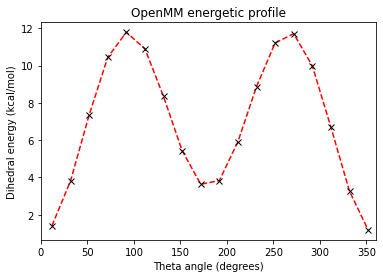

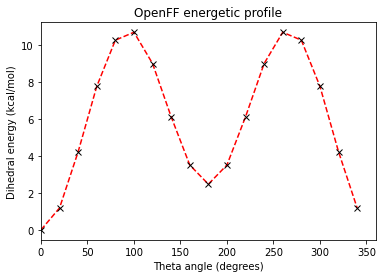

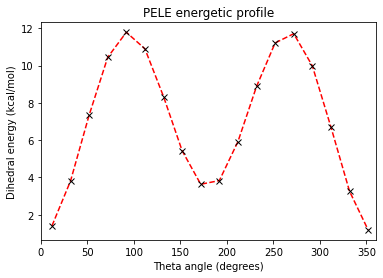

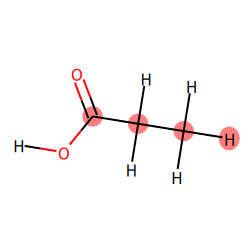

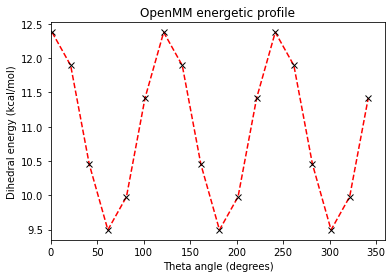

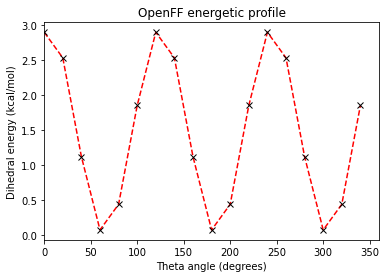

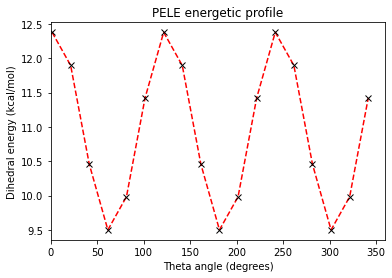

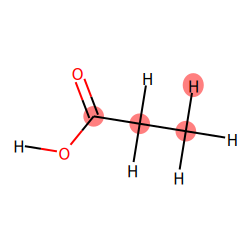

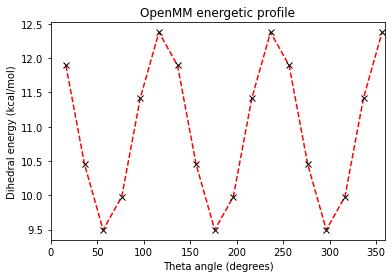

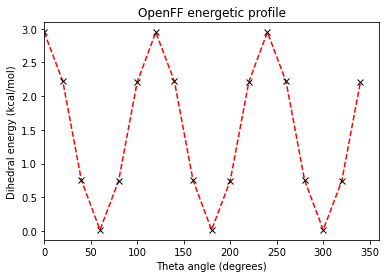

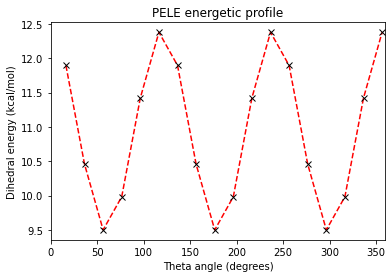

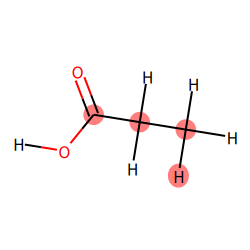

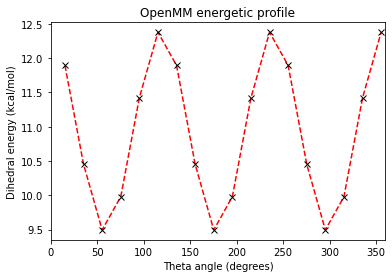

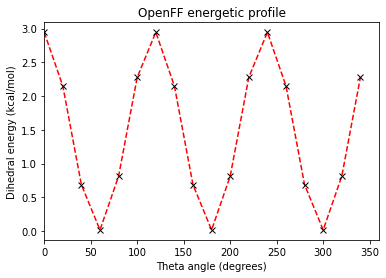

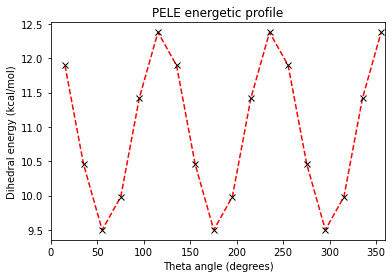

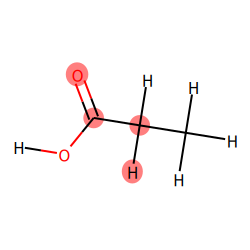

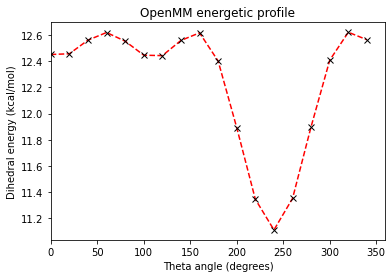

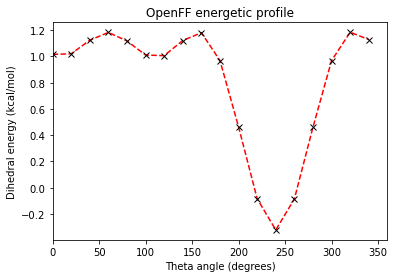

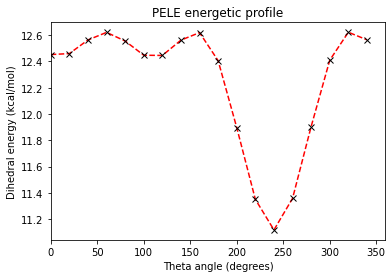

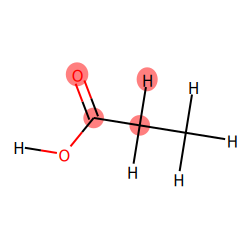

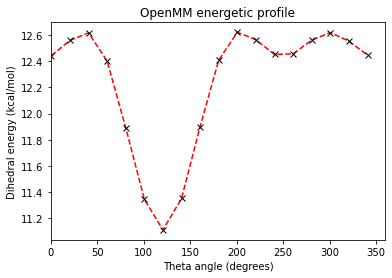

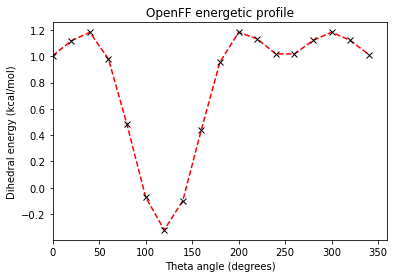

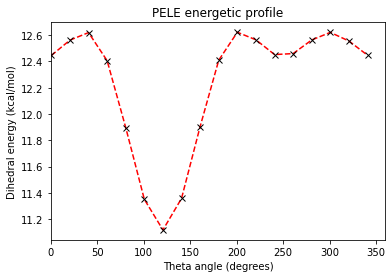

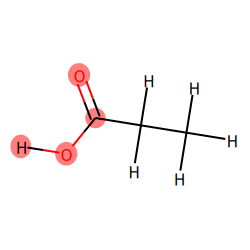

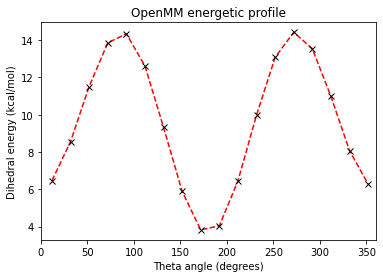

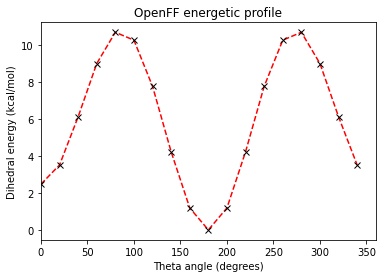

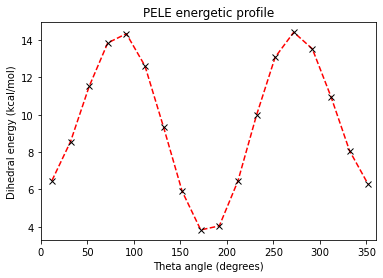

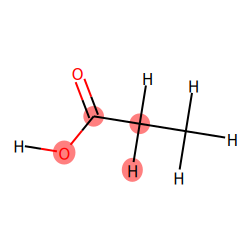

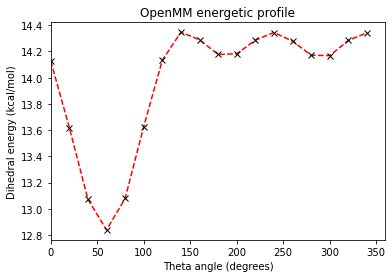

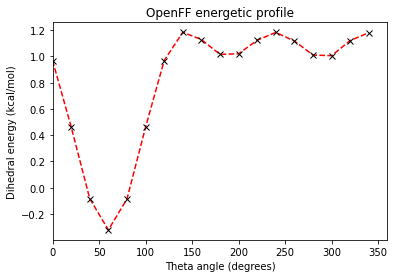

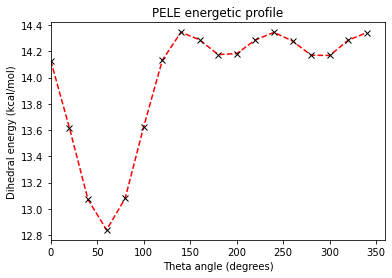

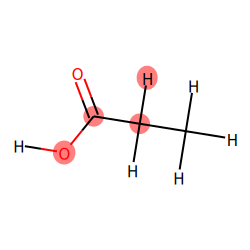

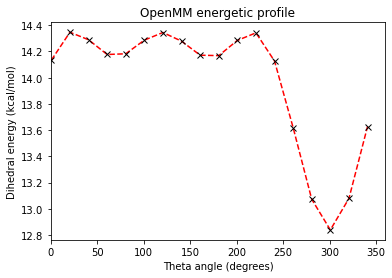

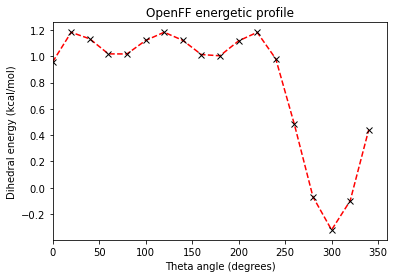

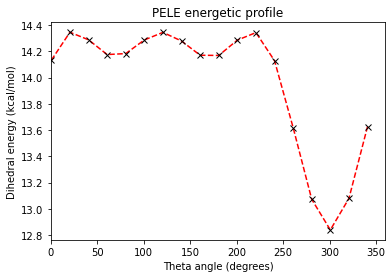

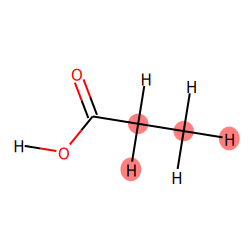

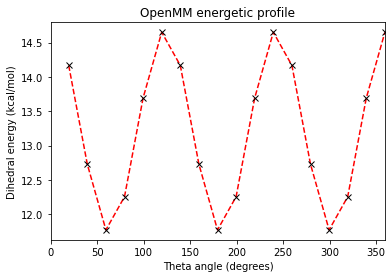

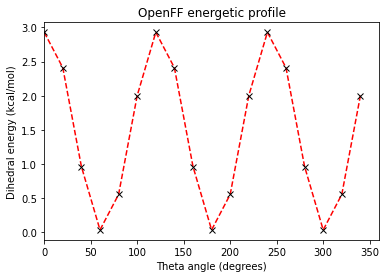

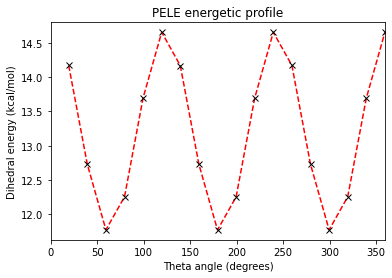

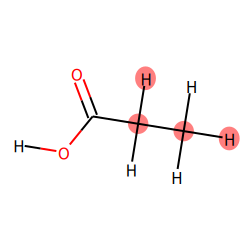

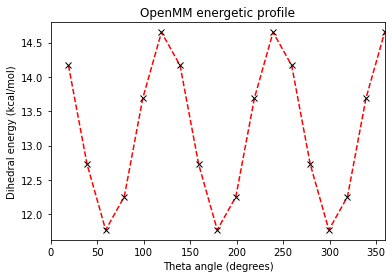

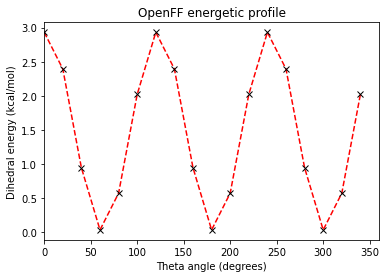

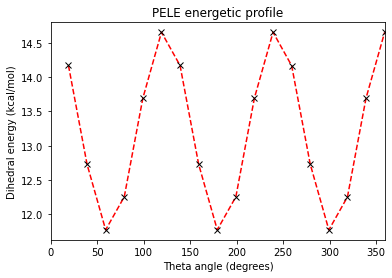

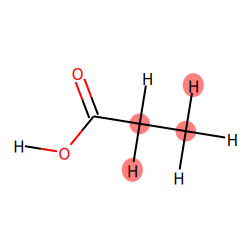

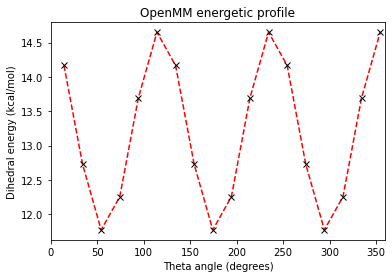

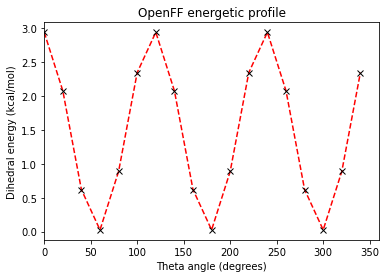

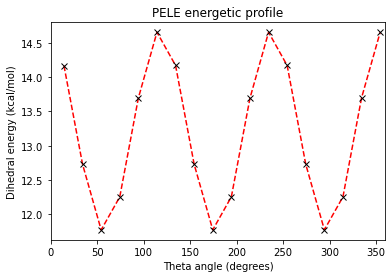

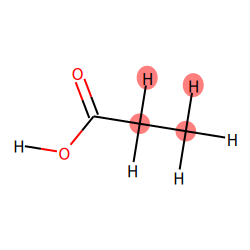

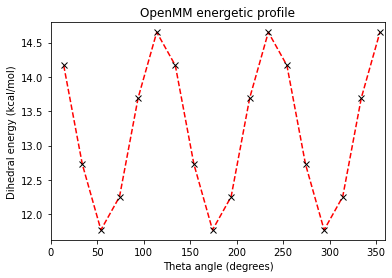

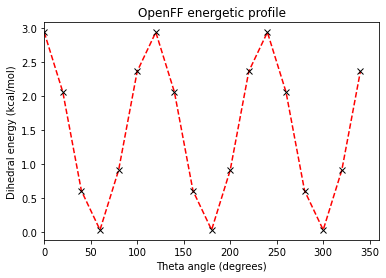

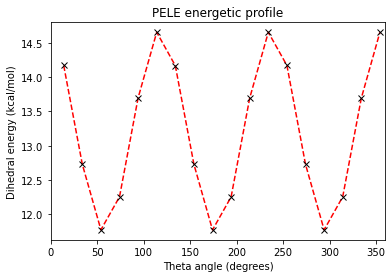

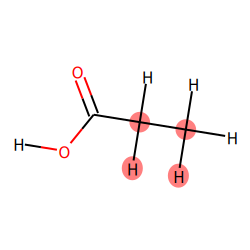

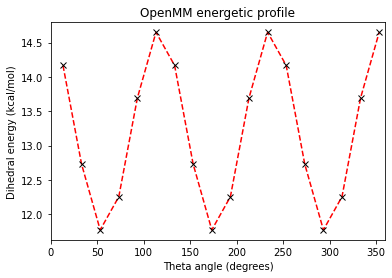

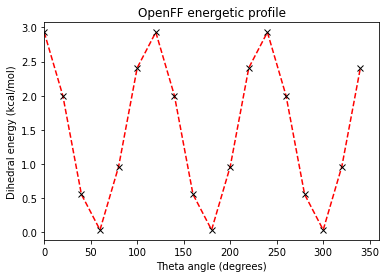

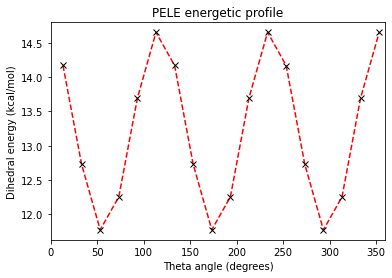

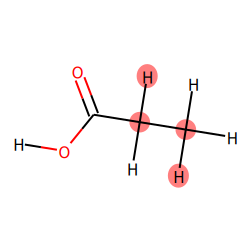

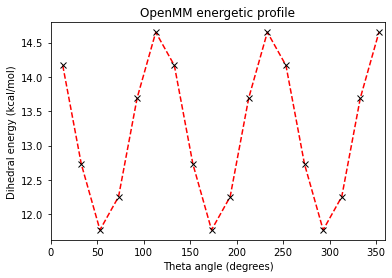

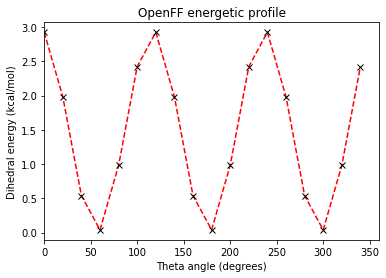

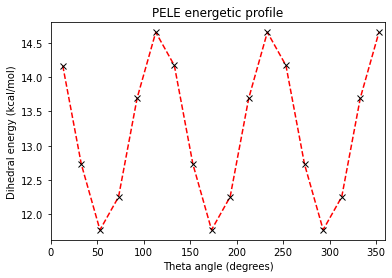

CPU times: user 1min 31s, sys: 53.6 s, total: 2min 25s
Wall time: 5min 4s


In [3]:
%%time
for dihedral in dict(parameters['ProperTorsions']):
    dihedral_benchmark = DihedralBenchmark(dihedral, mol)
    dihedral_benchmark.display_dihedral()
    omm_ep = OpenMMEnergeticProfile(dihedral_benchmark)
    off_ep = OpenFFEnergeticProfile(dihedral_benchmark)
    pele_ep = PELEEnergeticProfile(
        dihedral_benchmark,
        PELE_exec='/home/municoy/builds/PELE/PELE-repo_serial/PELE-1.6',
        PELE_src='/home/municoy/repos/PELE-repo/')
    omm_ep.plot_energies(resolution=20)
    off_ep.plot_energies(resolution=20)
    pele_ep.plot_energies(resolution=20)